In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.


In [2]:
account_file = open("mnist_dataset/勘定科目コード.csv",'r')
account_data = account_file.readlines()
account_file.close()

In [3]:
# 読み込んだデータをPythonリスト形式に変換して、先頭のラベルと2桁目以降の画像データを分離する
n = len(account_data)
account_list = []
account_target = []
for i in range(n):
    account_list.append(list(map(int, account_data[i].split(',')[0])))
    account_target.append(int(account_data[i].split(',')[3]))

In [4]:
# テスト用にデータを抽出する
#N = 30000 # MNISTの一部のデータで実験
# indices = np.random.permutation(range(n))[:N]
#X = []
#y = []
#for i in indices:
#    X.append(mnist_list[i])
#    y.append(mnist_target[i])

X = account_list
y = account_target
Y = np.eye(5)[y] # 1-of-k表現に変換

In [5]:
# データの正規化
X = np.array(X)
X = X / X.max()
X = X - X.mean(axis=1).reshape(len(X), 1)

In [6]:
N_train = 0.8
N_validation =0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=N_train)

# 訓練データをさらに訓練データと検証データに分類
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = N_validation)

//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
# モデル設定
n_in = len(X[0])    # 入力層のノード数
n_hiddens = [10,10,10]   # 隠れ層のノード数
n_out = len(Y[0])   # 出力層のノード数
activation = 'relu' # 活性化関数　出力の値を0~1の確率変数に置き換える 'sigmoid''tanh''relu'　

def weight_variable(shape, name=None):
    return np.sqrt(2.0 / shape[0]) * np.random.normal(size=shape)

model = Sequential()

# 入力層、隠れ層を生成する
for i, input_dim in enumerate(([n_in] + n_hiddens)[:-1]):
    model.add(Dense(n_hiddens[i], input_dim=input_dim,
                    kernel_initializer=weight_variable))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.5)) # オーバーフィッティング対策　学習時に間引くノードの確率

# 出力層を生成する  
model.add(Dense(n_out, kernel_initializer=weight_variable))
model.add(Activation('softmax'))

model.summary()

# 学習の準備　optimizer:勾配法　loss:誤差関数　metrics:評価関数
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.01, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
__________

In [8]:
# モデル学習
epochs = 1000
batch_size = len(X_train)    #1:確率的勾配降下法　M:（<=N）ミニバッチ勾配降下法
# 過学習（オーバーフィッティング）防止の為、前のエポックのときと比べ誤差が増えたら学習を打ち切る
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

hist = model.fit(X_train, Y_train, epochs=epochs,
                 batch_size=batch_size,
                 validation_data=(X_validation, Y_validation),
                 callbacks=[early_stopping])

Train on 116 samples, validate on 30 samples
Epoch 1/1000
116/116 [==============================] - 2s 13ms/step - loss: 2.5412 - acc: 0.1466 - val_loss: 1.6308 - val_acc: 0.2667
Epoch 2/1000
116/116 [==============================] - 0s 48us/step - loss: 2.5004 - acc: 0.1810 - val_loss: 1.6004 - val_acc: 0.5000
Epoch 3/1000
116/116 [==============================] - 0s 49us/step - loss: 2.1768 - acc: 0.2759 - val_loss: 1.5710 - val_acc: 0.5333
Epoch 4/1000
116/116 [==============================] - 0s 44us/step - loss: 2.3423 - acc: 0.2586 - val_loss: 1.5491 - val_acc: 0.5333
Epoch 5/1000
116/116 [==============================] - 0s 40us/step - loss: 1.9927 - acc: 0.3103 - val_loss: 1.5308 - val_acc: 0.5000
Epoch 6/1000
116/116 [==============================] - 0s 46us/step - loss: 1.9197 - acc: 0.3276 - val_loss: 1.5156 - val_acc: 0.5000
Epoch 7/1000
116/116 [==============================] - 0s 42us/step - loss: 2.0968 - acc: 0.2845 - val_loss: 1.5023 - val_acc: 0.5000
Epoch 8/10

Epoch 61/1000
116/116 [==============================] - 0s 46us/step - loss: 1.1118 - acc: 0.6034 - val_loss: 1.2368 - val_acc: 0.4667
Epoch 62/1000
116/116 [==============================] - 0s 42us/step - loss: 1.1428 - acc: 0.5948 - val_loss: 1.2311 - val_acc: 0.4667
Epoch 63/1000
116/116 [==============================] - 0s 46us/step - loss: 1.1012 - acc: 0.5862 - val_loss: 1.2250 - val_acc: 0.4667
Epoch 64/1000
116/116 [==============================] - 0s 43us/step - loss: 1.1590 - acc: 0.5862 - val_loss: 1.2199 - val_acc: 0.4667
Epoch 65/1000
116/116 [==============================] - 0s 37us/step - loss: 1.1212 - acc: 0.6034 - val_loss: 1.2149 - val_acc: 0.4667
Epoch 66/1000
116/116 [==============================] - 0s 39us/step - loss: 1.1359 - acc: 0.5776 - val_loss: 1.2110 - val_acc: 0.4667
Epoch 67/1000
116/116 [==============================] - 0s 43us/step - loss: 1.0839 - acc: 0.6034 - val_loss: 1.2074 - val_acc: 0.4667
Epoch 68/1000
116/116 [=========================

116/116 [==============================] - 0s 44us/step - loss: 0.9542 - acc: 0.6207 - val_loss: 0.9927 - val_acc: 0.6667
Epoch 122/1000
116/116 [==============================] - 0s 41us/step - loss: 0.9642 - acc: 0.6034 - val_loss: 0.9885 - val_acc: 0.6667
Epoch 123/1000
116/116 [==============================] - 0s 43us/step - loss: 0.9310 - acc: 0.6293 - val_loss: 0.9838 - val_acc: 0.6667
Epoch 124/1000
116/116 [==============================] - 0s 44us/step - loss: 0.9386 - acc: 0.6121 - val_loss: 0.9787 - val_acc: 0.6667
Epoch 125/1000
116/116 [==============================] - 0s 41us/step - loss: 1.0118 - acc: 0.5948 - val_loss: 0.9743 - val_acc: 0.6667
Epoch 126/1000
116/116 [==============================] - 0s 39us/step - loss: 1.0544 - acc: 0.6121 - val_loss: 0.9695 - val_acc: 0.6667
Epoch 127/1000
116/116 [==============================] - 0s 44us/step - loss: 0.9781 - acc: 0.6379 - val_loss: 0.9650 - val_acc: 0.6667
Epoch 128/1000
116/116 [==============================] 

Epoch 181/1000
116/116 [==============================] - 0s 44us/step - loss: 0.8773 - acc: 0.6724 - val_loss: 0.8128 - val_acc: 0.6667
Epoch 182/1000
116/116 [==============================] - 0s 45us/step - loss: 0.8429 - acc: 0.6552 - val_loss: 0.8097 - val_acc: 0.6667
Epoch 183/1000
116/116 [==============================] - 0s 42us/step - loss: 0.8491 - acc: 0.6983 - val_loss: 0.8077 - val_acc: 0.6667
Epoch 184/1000
116/116 [==============================] - 0s 43us/step - loss: 0.8542 - acc: 0.6724 - val_loss: 0.8053 - val_acc: 0.6667
Epoch 185/1000
116/116 [==============================] - 0s 43us/step - loss: 0.8278 - acc: 0.6810 - val_loss: 0.8029 - val_acc: 0.7000
Epoch 186/1000
116/116 [==============================] - 0s 37us/step - loss: 0.8231 - acc: 0.6466 - val_loss: 0.8007 - val_acc: 0.7000
Epoch 187/1000
116/116 [==============================] - 0s 44us/step - loss: 0.8669 - acc: 0.6466 - val_loss: 0.7983 - val_acc: 0.7000
Epoch 188/1000
116/116 [=================

Epoch 241/1000
116/116 [==============================] - 0s 34us/step - loss: 0.7235 - acc: 0.6897 - val_loss: 0.7116 - val_acc: 0.7333
Epoch 00241: early stopping


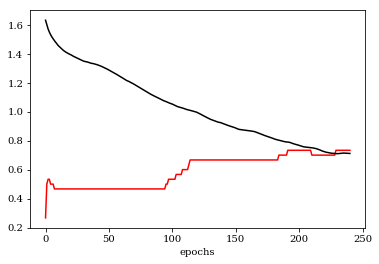

In [9]:
# 学習の進み具合を可視化

val_acc = hist.history['val_acc']
val_loss = hist.history['val_loss']

plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(len(val_acc)), val_acc, label='val_acc', color='red')
plt.plot(range(len(val_loss)), val_loss, label='val_loss', color='black')

plt.xlabel('epochs')
plt.show()

In [10]:
# 予測精度の評価
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics) # 1番目：誤差関数の値、2番目：予測精度

37/37 [==============================] - 0s 102us/step
[0.85606836950456777, 0.7297297313406661]


In [11]:
# テスト用データを使用して予測する
test_size = 10
X_predict = np.argmax(model.predict(X_test[0:test_size]),axis=1)
print(X_predict)

[4 0 4 0 4 1 4 0 0 0]


In [12]:
# テスト用データの正解　0：資産　1：負債　2：純資産　3：収益　4：費用
print(np.argmax(Y_test[0:test_size],axis=1))

[4 0 4 2 4 1 4 0 1 0]


In [27]:
# 予測が正しかったか判定する
X_predict == np.argmax(Y_test[0:test_size],axis=1)

array([ True,  True, False,  True,  True,  True, False,  True,  True, False], dtype=bool)

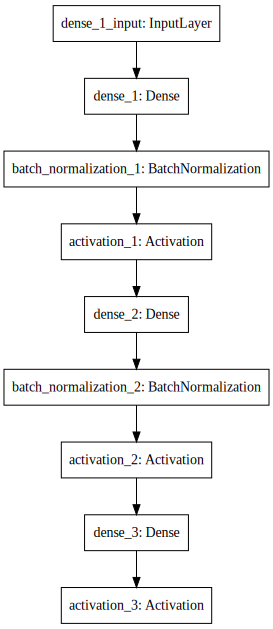

In [14]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))